This model applies linear regression to describe the relationship between measured voltage (input) and measured current (output).
It fits a straight line of the form I=aV+bI = aV + bI=aV+b, where the slope quantifies how strongly current changes with voltage and the intercept represents a constant offset.
The model is used to summarize the dominant linear trend, estimate electrical behavior, and make interpolated current predictions within the measured voltage range.

| Metric                  | What it tells you about the material | EV relevance                                                    |
| ----------------------- | ------------------------------------ | --------------------------------------------------------------- |
| **Slope (a)** of I vs V | Electrical conductance               | Higher slope → lower internal resistance → higher EV efficiency |
| **Intercept (b)**       | Offset current                       | Indicates leakage/self-discharge                                |
| **RMSE / residuals**    | How well linear model fits           | Lower residuals → more predictable behavior under load          |
| **R²**                  | Fraction of variance explained       | High R² → material behaves linearly → stable performance        |
| **Slope over cycles**   | Degradation trend                    | Smaller decline → longer battery lifespan                       |


Linear Regression - RMSE: 0.010, R^2: 0.002


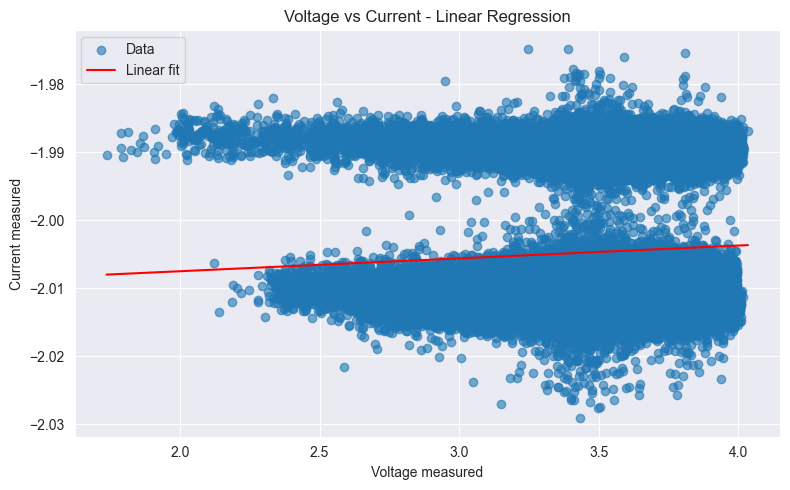

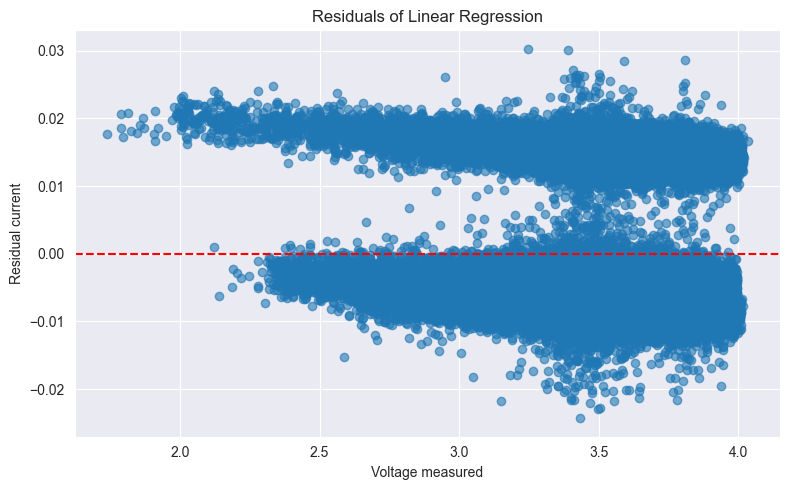

No 'mode' column to segment charge/discharge
Polynomial Degree 2 - RMSE: 0.010, R^2: 0.006


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# ---------------------------
# 1. Load dataset
# ---------------------------
da = pd.read_csv("discharge.csv")  # replace with your file path

# Ensure relevant columns exist
assert 'Voltage_measured' in da.columns and 'Current_measured' in da.columns, "Columns missing"

# ---------------------------
# 2. Prepare data
# ---------------------------
X = da[['Voltage_measured']]
y = da[['Current_measured']]

# ---------------------------
# 3. Fit linear regression
# ---------------------------
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Metrics
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"Linear Regression - RMSE: {rmse:.3f}, R^2: {r2:.3f}")

# ---------------------------
# 4. Plot regression line & scatter
# ---------------------------
x_line = np.linspace(X['Voltage_measured'].min(), X['Voltage_measured'].max(), 100).reshape(-1,1)
x_line_df = pd.DataFrame(x_line, columns=['Voltage_measured'])
y_line = model.predict(x_line_df)

plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.6, label="Data")
plt.plot(x_line, y_line, color='red', label="Linear fit")
plt.xlabel("Voltage measured")
plt.ylabel("Current measured")
plt.title("Voltage vs Current - Linear Regression")
plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------
# 5. Residual analysis
# ---------------------------
residuals = y - y_pred
plt.figure(figsize=(8,5))
plt.scatter(X, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Voltage measured")
plt.ylabel("Residual current")
plt.title("Residuals of Linear Regression")
plt.tight_layout()
plt.show()

# ---------------------------
# 6. Segment charge vs discharge
# ---------------------------
if 'mode' in da.columns:
    for m in da['mode'].unique():
        subset = da[da['mode'] == m]
        X_sub = subset[['Voltage_measured']]
        y_sub = subset[['Current_measured']]
        model_sub = LinearRegression()
        model_sub.fit(X_sub, y_sub)
        slope = model_sub.coef_[0][0]
        intercept = model_sub.intercept_[0]
        print(f"Mode: {m}, Slope: {slope:.3f}, Intercept: {intercept:.3f}")
else:
    print("No 'mode' column to segment charge/discharge")

# ---------------------------
# 7. Track slope over cycles (if cycle column exists)
# ---------------------------
if 'cycle' in da.columns:
    slopes = []
    cycles = sorted(da['cycle'].unique())
    for c in cycles:
        subset = da[da['cycle']==c]
        X_c = subset[['Voltage_measured']]
        y_c = subset[['Current_measured']]
        model_c = LinearRegression()
        model_c.fit(X_c, y_c)
        slopes.append(model_c.coef_[0][0])
    plt.figure(figsize=(8,5))
    plt.plot(cycles, slopes, marker='o')
    plt.xlabel("Cycle")
    plt.ylabel("Slope (Conductance)")
    plt.title("Slope vs Cycle")
    plt.tight_layout()
    plt.show()

# ---------------------------
# 8. Optional: Polynomial comparison (degree 2)
# ---------------------------
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(X, y)
y_poly_pred = poly_model.predict(X)
rmse_poly = np.sqrt(mean_squared_error(y, y_poly_pred))
r2_poly = r2_score(y, y_poly_pred)
print(f"Polynomial Degree 2 - RMSE: {rmse_poly:.3f}, R^2: {r2_poly:.3f}")


In [6]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169766 entries, 0 to 169765
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Voltage_measured      169766 non-null  float64
 1   Current_measured      169766 non-null  float64
 2   Temperature_measured  169766 non-null  float64
 3   Current_charge        169766 non-null  float64
 4   Voltage_charge        169766 non-null  float64
 5   Time                  169766 non-null  float64
 6   Capacity              169766 non-null  float64
 7   id_cycle              169766 non-null  int64  
 8   type                  169766 non-null  object 
 9   ambient_temperature   169766 non-null  int64  
 10  time                  169766 non-null  float64
 11  Battery               169766 non-null  object 
dtypes: float64(8), int64(2), object(2)
memory usage: 15.5+ MB
